# ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import xgboost as xgb
import lightgbm as lgb
import shap
from sklearn.metrics import log_loss

# EDA


In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
drop_cols = ['PassengerId', 'Cabin', 'Name']
cat_cols = ['HomePlanet', 'CryoSleep', 'Destination','VIP','Transported']

In [6]:
df_drop = df.drop(drop_cols, axis=1)

In [7]:
for c in cat_cols:
    le = LabelEncoder()
    le.fit(df_drop[c])
    df_drop[c] = le.transform(df_drop[c])

for c in cat_cols:
    df_drop[c] = df_drop[c].astype('category')

# カテゴリカルデータ

In [8]:
unique_homeplanet = df['HomePlanet'].unique()
unique_cryosleep = df['CryoSleep'].unique()
unique_destination = df['Destination'].unique()
unique_vip = df['VIP'].unique()


print("特徴量       | 種類")
print("-"*70)
print("HomePlanet  |", unique_homeplanet)
print("CryoSleep   |", unique_cryosleep)
print("Destination |", unique_destination)
print("VIP         |",unique_vip)
print("-"*70)

特徴量       | 種類
----------------------------------------------------------------------
HomePlanet  | ['Europa' 'Earth' 'Mars' nan]
CryoSleep   | [False True nan]
Destination | ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]
VIP         | [False True nan]
----------------------------------------------------------------------


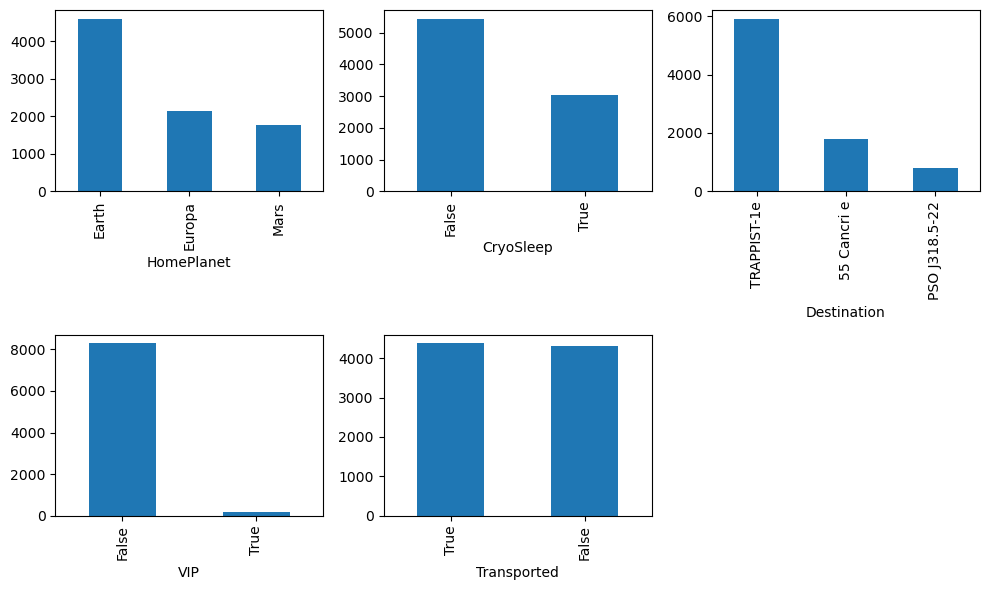

In [9]:
# カテゴリ変数のラベル内訳
plt.rcParams['figure.figsize'] = (10, 6)

for i, name in enumerate(cat_cols):
  ax = plt.subplot(2, 3, i+1)
  df[name].value_counts().plot(kind='bar', ax=ax)

plt.tight_layout() 
plt.show()

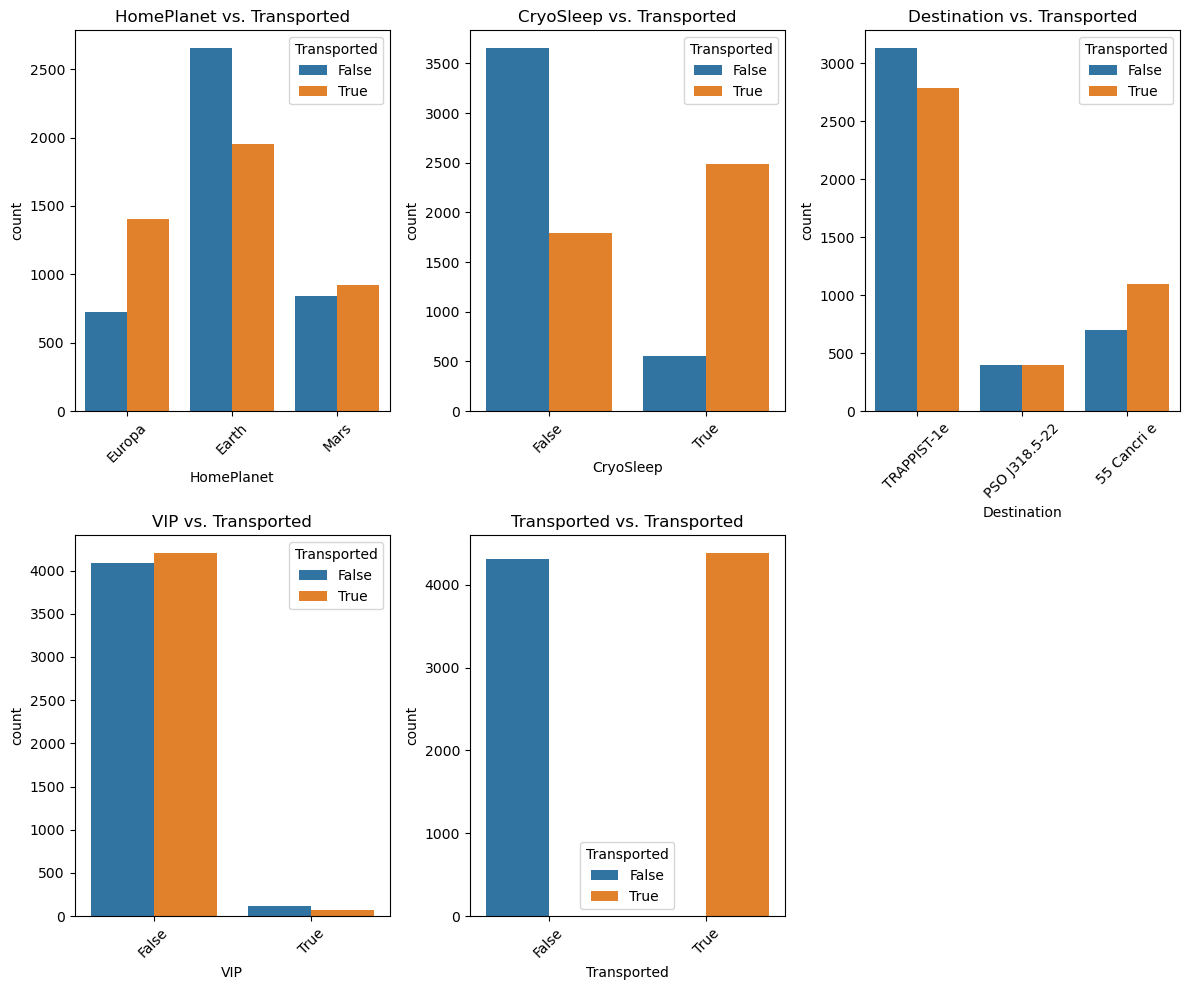

In [10]:


# カラム数に基づいて行と列の数を設定

cols = 3  # 3列で表示
rows = (len(cat_cols) + cols - 1) // cols  # 必要な行数を計算

# サブプロットの設定
fig, axes = plt.subplots(rows, cols, figsize=(12, 5 * rows))  # 各サブプロットのサイズを調整
axes = axes.flatten()  # 1Dに変換してインデックスでアクセスしやすくする

# 各カラムについてプロット
for i, name in enumerate(cat_cols):
    sns.countplot(x=name, hue='Transported', data=df, ax=axes[i])
    axes[i].set_title(f'{name} vs. Transported')
    axes[i].tick_params(axis='x', rotation=45)  # x軸のラベルを回転して表示

# 余分なサブプロットを非表示
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# 数値変数

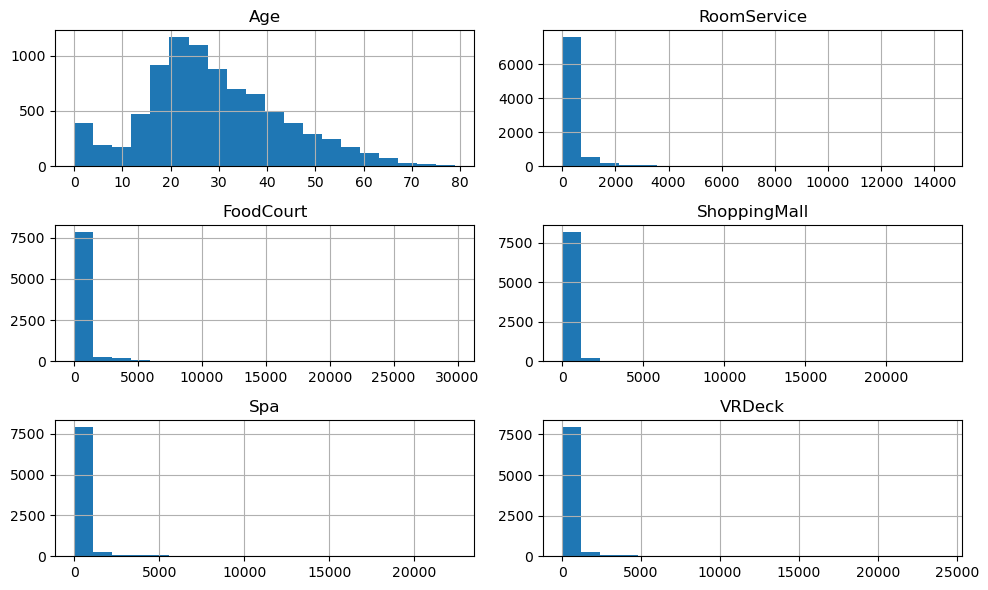

In [11]:
plt.rcParams['figure.figsize'] = (10, 6)
df.hist(bins=20)
plt.tight_layout() 
plt.show()

<Axes: >

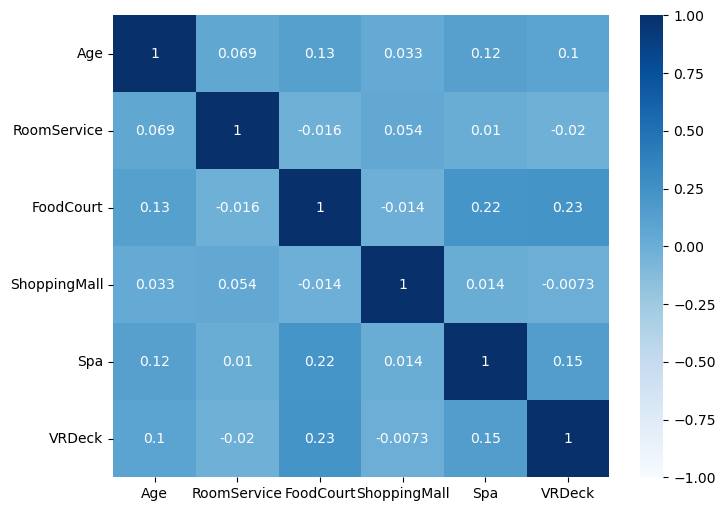

In [12]:
plt.figure(figsize=(8, 6))
df_corr = df.select_dtypes(include=['number']).corr()
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, annot=True, cmap = 'Blues')